## Alberto Lovell

alberto.lovell@gmail.com

https://www.linkedin.com/in/albertolovell/

In [280]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

## Purpose:
### The goal of this notebook is to explore differences in treatment patterns between Primary Care Providers (Internal Medicine, General Practicioners, and Family Practicioners), and Psychiatrists/Neurologists who prescribe psychiatric medication.

## Exploratory Data Analysis  

### We will exclusively use pandas DataFrames throughout this EDA by first creating one DataFrame with all providers who prescribed a psychiatric drug AND is either a Primary Care Provider or a Psychiatrist

In [279]:
drugs = pd.read_excel('data/PartD_Prescriber_PUF_Drug_Ntl_16.xlsx', sheet_name='Data', header=None)
drugs = drugs.iloc[2:]
drugs.columns = drugs.iloc[0]
drugs = drugs[1:]
drugs.head()

2,Drug Name,Generic Name,Number of Prescribers,Number of Medicare Part D Claims,Number of Standardized 30-Day Part D Fills,Aggregate Cost Paid for Part D Claims,Number of Medicare Beneficiaries,GE65 Suppression Flag,Number of Medicare Part D Claims for Beneficiaries 65+,Number of Standardized 30-Day Part D Fills for Beneficiaries 65+,Aggregate Cost Paid for Part D Claims for Beneficiaries 65+,Beneficiary 65+ Suppression Flag,Number of Medicare Beneficiaries 65+,Aggregate Cost Share for Beneficiaries with Low Income Subsidy,Aggregate Cost Share for Beneficiaries with No Low Income Subsidy,Opioid Drug Flag,Long-Acting Opioid Drug Flag,Antibiotic Drug Flag,Antipsychotic Drug Flag
3,1ST TIER UNIFINE PENTIPS,"PEN NEEDLE, DIABETIC",2832,8913,14253.8,216274,3428,,6665,10961.8,160301,,2599,9209.09,44253.4,N,N,N,N
4,1ST TIER UNIFINE PENTIPS PLUS,"PEN NEEDLE, DIABETIC",5048,14610,25998.3,378041,6564,,11088,20230.7,285671,,5023,12805.2,83730.9,N,N,N,N
5,ABACAVIR,ABACAVIR SULFATE,5650,66707,73303.6,1.93844e+07,9007,,22814,26105,6.75039e+06,,3034,41654,406354,N,N,N,N
6,ABACAVIR-LAMIVUDINE,ABACAVIR SULFATE/LAMIVUDINE,3257,13903,14875.2,1.47528e+07,6629,,4538,5060.3,4.9492e+06,,2184,2751.36,92745.4,N,N,N,N
7,ABACAVIR-LAMIVUDINE-ZIDOVUDINE,ABACAVIR/LAMIVUDINE/ZIDOVUDINE,1270,9768,10378.4,1.27877e+07,1333,,3463,3835.8,4.68118e+06,,480,21947.7,324390,N,N,N,N


In [4]:
drugs.columns

Index(['Drug Name', 'Generic Name', 'Number of Prescribers',
       'Number of Medicare Part D Claims',
       'Number of Standardized 30-Day Part D Fills',
       'Aggregate Cost Paid for Part D Claims',
       'Number of Medicare Beneficiaries', 'GE65 Suppression Flag',
       'Number of Medicare Part D Claims for Beneficiaries 65+',
       'Number of Standardized 30-Day Part D Fills for Beneficiaries 65+',
       'Aggregate Cost Paid for Part D Claims for Beneficiaries 65+',
       'Beneficiary 65+ Suppression Flag',
       'Number of Medicare Beneficiaries 65+',
       'Aggregate Cost Share for Beneficiaries with Low Income Subsidy',
       'Aggregate Cost Share for Beneficiaries with No Low Income Subsidy',
       'Opioid Drug Flag', 'Long-Acting Opioid Drug Flag',
       'Antibiotic Drug Flag', 'Antipsychotic Drug Flag'],
      dtype='object', name=2)

In [5]:
psych = drugs[drugs['Antipsychotic Drug Flag']=='Y ']

In [6]:
psych['Drug Name'].unique()
drug_list = psych['Drug Name'].str.strip().tolist()

In [7]:
psych['Generic Name'].unique()
generic_list = psych['Generic Name'].str.strip().tolist()

In [8]:
summary = pd.read_csv('data/PartD_Prescriber_PUF_NPI_16.txt', sep='\t', nrows=10000)
summary.head()

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,...,beneficiary_male_count,beneficiary_race_white_count,beneficiary_race_black_count,beneficiary_race_asian_pi_count,beneficiary_race_hispanic_count,beneficiary_race_nat_ind_count,beneficiary_race_other_count,beneficiary_nondual_count,beneficiary_dual_count,beneficiary_average_risk_score
0,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,80.0,153.0,NaN,0.0,NaN,0.0,NaN,102.0,68.0,2.1950
1,1003000142,KHALIL,RASHID,NaN,M.D.,M,I,4126 N HOLLAND SYLVANIA RD,SUITE 220,TOLEDO,...,88.0,159.0,54.0,NaN,NaN,0.0,NaN,108.0,117.0,1.8032
2,1003000167,ESCOBAR,JULIO,E,DDS,M,I,5 PINE CONE RD,NaN,DAYTON,...,12.0,NaN,0.0,NaN,0.0,0.0,0.0,NaN,NaN,1.0949
3,1003000282,BLAKEMORE,ROSIE,K,FNP,F,I,TENNESSEE PRISON FOR WOMEN,3881 STEWARTS LANE,NASHVILLE,...,11.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,1.7014
4,1003000407,GIRARDI,DAVID,J,D.O.,M,I,100 HOSPITAL RD,NaN,BROOKVILLE,...,64.0,NaN,NaN,0.0,0.0,0.0,NaN,129.0,61.0,1.9105


In [9]:
summary['specialty_description'].unique()

array(['Internal Medicine', 'Anesthesiology', 'Dentist',
       'Nurse Practitioner', 'Family Practice', 'Obstetrics & Gynecology',
       'General Surgery', 'Urology', 'Cardiac Surgery',
       'Physician Assistant', 'Dermatology',
       'Physical Medicine and Rehabilitation', 'Radiation Oncology',
       'Infectious Disease', 'Orthopedic Surgery', 'Endocrinology',
       'Psychiatry', 'Rheumatology', 'General Practice', 'Neurology',
       'Emergency Medicine', 'Nephrology', 'Preventive Medicine',
       'Hand Surgery', 'Psychiatry & Neurology', 'Ophthalmology',
       'Cardiovascular Disease (Cardiology)', 'Pulmonary Disease',
       'Otolaryngology', 'Plastic and Reconstructive Surgery',
       'Pharmacist', 'Interventional Cardiology', 'Gastroenterology',
       'Diagnostic Radiology', 'Geriatric Medicine', 'Pediatric Medicine',
       'Neurosurgery', 'Thoracic Surgery', 'Neuropsychiatry',
       'Pain Management', 'Oral Surgery (Dentists only)', 'Podiatry',
       'Optometry', '

In [10]:
summary = summary.loc[summary['specialty_description'].isin(['Internal Medicine', 'General Practice', 'Family Practice', 'Psychiatry', 'Neurology'])]
summary.head()

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,...,beneficiary_male_count,beneficiary_race_white_count,beneficiary_race_black_count,beneficiary_race_asian_pi_count,beneficiary_race_hispanic_count,beneficiary_race_nat_ind_count,beneficiary_race_other_count,beneficiary_nondual_count,beneficiary_dual_count,beneficiary_average_risk_score
0,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,80.0,153.0,NaN,0.0,NaN,0.0,NaN,102.0,68.0,2.1950
4,1003000407,GIRARDI,DAVID,J,D.O.,M,I,100 HOSPITAL RD,NaN,BROOKVILLE,...,64.0,NaN,NaN,0.0,0.0,0.0,NaN,129.0,61.0,1.9105
7,1003000522,WEIGAND,FREDERICK,J,MD,M,I,1565 SAXON BLVD,SUITE 102,DELTONA,...,189.0,375.0,NaN,NaN,34.0,0.0,NaN,364.0,65.0,1.1778
8,1003000530,SEMONCHE,AMANDA,M,DO,F,I,1021 PARK AVE,SUITE 203,QUAKERTOWN,...,186.0,453.0,NaN,NaN,NaN,0.0,NaN,398.0,74.0,1.2259
15,1003000902,LOHANO,JAIVANTI,NaN,MD,F,I,2215 PORTLAND AVE,NaN,LOUISVILLE,...,93.0,306.0,22.0,NaN,NaN,0.0,NaN,196.0,144.0,1.3653


In [11]:
summary['specialty_description'].unique()

array(['Internal Medicine', 'Family Practice', 'Psychiatry',
       'General Practice', 'Neurology'], dtype=object)

In [12]:
prescriber = pd.read_csv('data/PartD_Prescriber_PUF_NPI_Drug_16(1).txt', sep='\t', nrows=10000)
prescriber.columns

Index(['npi', 'nppes_provider_last_org_name', 'nppes_provider_first_name',
       'nppes_provider_city', 'nppes_provider_state', 'specialty_description',
       'description_flag', 'drug_name', 'generic_name', 'bene_count',
       'total_claim_count', 'total_30_day_fill_count', 'total_day_supply',
       'total_drug_cost', 'bene_count_ge65', 'bene_count_ge65_suppress_flag',
       'total_claim_count_ge65', 'ge65_suppress_flag',
       'total_30_day_fill_count_ge65', 'total_day_supply_ge65',
       'total_drug_cost_ge65'],
      dtype='object')

In [13]:
prescriber = prescriber.loc[(prescriber['drug_name'].isin(drug_list)) | prescriber['generic_name'].isin(generic_list)]
prescriber.head()

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_city,nppes_provider_state,specialty_description,description_flag,drug_name,generic_name,bene_count,...,total_30_day_fill_count,total_day_supply,total_drug_cost,bene_count_ge65,bene_count_ge65_suppress_flag,total_claim_count_ge65,ge65_suppress_flag,total_30_day_fill_count_ge65,total_day_supply_ge65,total_drug_cost_ge65
79,1003000407,GIRARDI,DAVID,BROOKVILLE,PA,Family Practice,S,OLANZAPINE,OLANZAPINE,NaN,...,16.0,407,162.69,NaN,*,16.0,NaN,16.0,407.0,162.69
88,1003000407,GIRARDI,DAVID,BROOKVILLE,PA,Family Practice,S,RISPERIDONE,RISPERIDONE,NaN,...,35.0,909,252.17,NaN,*,35.0,NaN,35.0,909.0,252.17
181,1003000522,WEIGAND,FREDERICK,DELTONA,FL,Family Practice,S,QUETIAPINE FUMARATE,QUETIAPINE FUMARATE,NaN,...,16.0,480,117.55,NaN,*,13.0,NaN,16.0,480.0,117.55
213,1003000530,SEMONCHE,AMANDA,QUAKERTOWN,PA,Internal Medicine,S,ARIPIPRAZOLE,ARIPIPRAZOLE,NaN,...,25.0,750,4767.89,NaN,*,NaN,*,NaN,NaN,NaN
308,1003000530,SEMONCHE,AMANDA,QUAKERTOWN,PA,Internal Medicine,S,QUETIAPINE FUMARATE,QUETIAPINE FUMARATE,NaN,...,65.2,1900,1735.89,NaN,*,43.0,NaN,51.0,1476.0,1498.62


In [14]:
prescriber.generic_name.unique()

array(['OLANZAPINE', 'RISPERIDONE', 'QUETIAPINE FUMARATE', 'ARIPIPRAZOLE',
       'ZIPRASIDONE HCL', 'CLOZAPINE', 'FLUPHENAZINE HCL', 'HALOPERIDOL',
       'HALOPERIDOL DECANOATE', 'PALIPERIDONE PALMITATE',
       'ASENAPINE MALEATE', 'CHLORPROMAZINE HCL', 'PALIPERIDONE',
       'LURASIDONE HCL', 'PERPHENAZINE', 'RISPERIDONE MICROSPHERES',
       'THIORIDAZINE HCL', 'THIOTHIXENE', 'TRIFLUOPERAZINE HCL',
       'BREXPIPRAZOLE', 'PIMAVANSERIN TARTRATE', 'LOXAPINE SUCCINATE',
       'ARIPIPRAZOLE LAUROXIL', 'CARIPRAZINE HCL', 'ILOPERIDONE'],
      dtype=object)

In [15]:
prescriber.drug_name.unique()

array(['OLANZAPINE', 'RISPERIDONE', 'QUETIAPINE FUMARATE', 'ARIPIPRAZOLE',
       'ZIPRASIDONE HCL', 'SEROQUEL XR', 'CLOZAPINE', 'FLUPHENAZINE HCL',
       'HALOPERIDOL', 'HALOPERIDOL DECANOATE', 'INVEGA SUSTENNA',
       'OLANZAPINE ODT', 'SAPHRIS', 'ABILIFY', 'CHLORPROMAZINE HCL',
       'CLOZARIL', 'INVEGA', 'LATUDA', 'PERPHENAZINE', 'RISPERDAL CONSTA',
       'RISPERIDONE ODT', 'THIORIDAZINE HCL', 'THIOTHIXENE',
       'TRIFLUOPERAZINE HCL', 'REXULTI', 'ABILIFY MAINTENA', 'NUPLAZID',
       'HALOPERIDOL DECANOATE 100', 'LOXAPINE', 'PALIPERIDONE ER',
       'ARISTADA', 'VRAYLAR', 'FANAPT'], dtype=object)

In [16]:
df = summary.join(prescriber, on='npi', how='left', rsuffix='_right')
df.head()

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,...,total_30_day_fill_count_right,total_day_supply_right,total_drug_cost_right,bene_count_ge65_right,bene_count_ge65_suppress_flag_right,total_claim_count_ge65_right,ge65_suppress_flag_right,total_30_day_fill_count_ge65_right,total_day_supply_ge65_right,total_drug_cost_ge65_right
0,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1003000407,GIRARDI,DAVID,J,D.O.,M,I,100 HOSPITAL RD,NaN,BROOKVILLE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1003000522,WEIGAND,FREDERICK,J,MD,M,I,1565 SAXON BLVD,SUITE 102,DELTONA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1003000530,SEMONCHE,AMANDA,M,DO,F,I,1021 PARK AVE,SUITE 203,QUAKERTOWN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,1003000902,LOHANO,JAIVANTI,NaN,MD,F,I,2215 PORTLAND AVE,NaN,LOUISVILLE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
summary.columns

Index(['npi', 'nppes_provider_last_org_name', 'nppes_provider_first_name',
       'nppes_provider_mi', 'nppes_credentials', 'nppes_provider_gender',
       'nppes_entity_code', 'nppes_provider_street1', 'nppes_provider_street2',
       'nppes_provider_city', 'nppes_provider_zip5', 'nppes_provider_zip4',
       'nppes_provider_state', 'nppes_provider_country',
       'specialty_description', 'description_flag',
       'medicare_prvdr_enroll_status', 'total_claim_count',
       'total_30_day_fill_count', 'total_drug_cost', 'total_day_supply',
       'bene_count', 'ge65_suppress_flag', 'total_claim_count_ge65',
       'total_30_day_fill_count_ge65', 'total_drug_cost_ge65',
       'total_day_supply_ge65', 'bene_count_ge65_suppress_flag',
       'bene_count_ge65', 'brand_suppress_flag', 'brand_claim_count',
       'brand_drug_cost', 'generic_suppress_flag', 'generic_claim_count',
       'generic_drug_cost', 'other_suppress_flag', 'other_claim_count',
       'other_drug_cost', 'mapd_suppress

In [18]:
df1 = df[['npi','specialty_description', 'total_claim_count', 'total_30_day_fill_count', 'total_drug_cost', 'total_day_supply', 'bene_count', 'brand_claim_count', 
             'brand_drug_cost', 'generic_claim_count', 'generic_drug_cost', 'opioid_claim_count', 'opioid_drug_cost', 'opioid_prescriber_rate', 'average_age_of_beneficiaries', 
             'beneficiary_female_count', 'beneficiary_male_count', 'beneficiary_race_white_count', 'beneficiary_race_black_count', 'beneficiary_race_asian_pi_count',
              'beneficiary_race_hispanic_count', 'beneficiary_race_nat_ind_count', 'beneficiary_race_other_count', 'beneficiary_average_risk_score']]
df1.head()

,npi,specialty_description,total_claim_count,total_30_day_fill_count,total_drug_cost,total_day_supply,bene_count,brand_claim_count,brand_drug_cost,generic_claim_count,...,average_age_of_beneficiaries,beneficiary_female_count,beneficiary_male_count,beneficiary_race_white_count,beneficiary_race_black_count,beneficiary_race_asian_pi_count,beneficiary_race_hispanic_count,beneficiary_race_nat_ind_count,beneficiary_race_other_count,beneficiary_average_risk_score
0,1003000126,Internal Medicine,545,563.4,33618.18,12120,170.0,NaN,NaN,414.0,...,71.0,90.0,80.0,153.0,NaN,0.0,NaN,0.0,NaN,2.1950
4,1003000407,Family Practice,2225,2238.5,112183.11,45674,190.0,606.0,85782.84,1605.0,...,79.0,126.0,64.0,NaN,NaN,0.0,0.0,0.0,NaN,1.9105
7,1003000522,Family Practice,5189,11105.7,290256.70,324707,429.0,688.0,192126.75,4478.0,...,75.0,240.0,189.0,375.0,NaN,NaN,34.0,0.0,NaN,1.1778
8,1003000530,Internal Medicine,7047,10804.8,347024.06,313069,472.0,992.0,227703.27,6002.0,...,72.0,286.0,186.0,453.0,NaN,NaN,NaN,0.0,NaN,1.2259
15,1003000902,Family Practice,6185,10050.1,317866.00,290559,340.0,1063.0,224475.13,5062.0,...,64.0,247.0,93.0,306.0,22.0,NaN,NaN,0.0,NaN,1.3653


In [20]:
#df1.to_csv('data/joined.csv', index=False)

In [200]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2616 entries, 0 to 9999
Data columns (total 24 columns):
npi                                2616 non-null int64
specialty_description              2616 non-null object
total_claim_count                  2616 non-null int64
total_30_day_fill_count            2616 non-null float64
total_drug_cost                    2616 non-null float64
total_day_supply                   2616 non-null int64
bene_count                         2422 non-null float64
brand_claim_count                  1717 non-null float64
brand_drug_cost                    1717 non-null float64
generic_claim_count                2346 non-null float64
generic_drug_cost                  2346 non-null float64
opioid_claim_count                 2077 non-null float64
opioid_drug_cost                   2077 non-null float64
opioid_prescriber_rate             2077 non-null float64
average_age_of_beneficiaries       2422 non-null float64
beneficiary_female_count           2166 non-n

## Correlation

### After cleaning data and labeling Primary Care Providers (1) vs Psychiatrists (0) we can then explore correlation between selected features and type of Doctor

In [202]:
df1['specialty_description'].unique()

array(['Internal Medicine', 'Family Practice', 'Psychiatry',
       'General Practice', 'Neurology'], dtype=object)

In [204]:
df_pcp = df1.loc[df1['specialty_description'].isin(['Internal Medicine', 'General Practice', 'Family Practice'])]

In [209]:
#primary care provider == 1

df_pcp['type'] = 1
df_pcp.head()

/Users/Beto/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,npi,specialty_description,total_claim_count,total_30_day_fill_count,total_drug_cost,total_day_supply,bene_count,brand_claim_count,brand_drug_cost,generic_claim_count,...,beneficiary_female_count,beneficiary_male_count,beneficiary_race_white_count,beneficiary_race_black_count,beneficiary_race_asian_pi_count,beneficiary_race_hispanic_count,beneficiary_race_nat_ind_count,beneficiary_race_other_count,beneficiary_average_risk_score,type
0,1003000126,Internal Medicine,545,563.4,33618.18,12120,170.0,NaN,NaN,414.0,...,90.0,80.0,153.0,NaN,0.0,NaN,0.0,NaN,2.1950,1
4,1003000407,Family Practice,2225,2238.5,112183.11,45674,190.0,606.0,85782.84,1605.0,...,126.0,64.0,NaN,NaN,0.0,0.0,0.0,NaN,1.9105,1
7,1003000522,Family Practice,5189,11105.7,290256.70,324707,429.0,688.0,192126.75,4478.0,...,240.0,189.0,375.0,NaN,NaN,34.0,0.0,NaN,1.1778,1
8,1003000530,Internal Medicine,7047,10804.8,347024.06,313069,472.0,992.0,227703.27,6002.0,...,286.0,186.0,453.0,NaN,NaN,NaN,0.0,NaN,1.2259,1
15,1003000902,Family Practice,6185,10050.1,317866.00,290559,340.0,1063.0,224475.13,5062.0,...,247.0,93.0,306.0,22.0,NaN,NaN,0.0,NaN,1.3653,1


In [205]:
df_psych = df1.loc[df1['specialty_description'].isin(['Psychiatry', 'Neurology'])]

In [210]:
#psychiatrist == 0

df_psych['type'] = 0
df_psych.head()

/Users/Beto/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,npi,specialty_description,total_claim_count,total_30_day_fill_count,total_drug_cost,total_day_supply,bene_count,brand_claim_count,brand_drug_cost,generic_claim_count,...,beneficiary_female_count,beneficiary_male_count,beneficiary_race_white_count,beneficiary_race_black_count,beneficiary_race_asian_pi_count,beneficiary_race_hispanic_count,beneficiary_race_nat_ind_count,beneficiary_race_other_count,beneficiary_average_risk_score,type
33,1003002106,Psychiatry,114,124.1,3579.62,3674,28.0,NaN,NaN,NaN,...,15.0,13.0,NaN,NaN,0.0,NaN,0.0,NaN,1.6164,0
45,1003002841,Neurology,80,120.5,26747.10,3605,38.0,16.0,24711.02,64.0,...,25.0,13.0,38.0,0.0,0.0,0.0,0.0,0.0,1.5526,0
50,1003003070,Neurology,452,533.3,34687.51,15675,92.0,62.0,28698.79,390.0,...,54.0,38.0,NaN,NaN,0.0,NaN,0.0,NaN,1.7686,0
92,1003006198,Neurology,830,1024.3,89063.70,29453,122.0,NaN,NaN,749.0,...,71.0,51.0,26.0,NaN,64.0,NaN,0.0,20.0,1.5482,0
103,1003006701,Psychiatry,1500,1559.0,74885.44,41972,257.0,129.0,44226.68,1371.0,...,151.0,106.0,208.0,26.0,NaN,NaN,NaN,NaN,1.4109,0


In [211]:
frames = [df_pcp, df_psych]
df2 = pd.concat(frames)

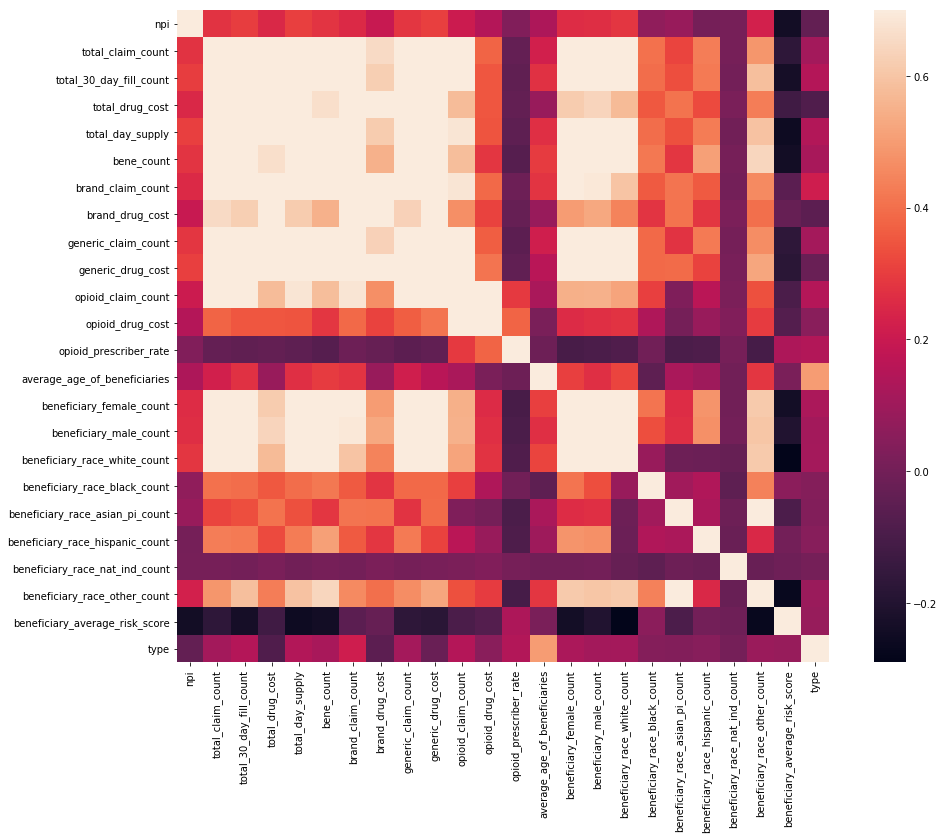

In [212]:
features = df2.corr()
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(features, vmax=0.7, square=True)

### We can now find the features which are most highly correlated with type of Doctor

In [278]:
#features with high correlation score

most_pertinent = features['type'].sort_values(ascending=False)
most_pertinent = most_pertinent[abs(most_pertinent) >= 0.14]
most_pertinent = most_pertinent[most_pertinent.index != 'type']
most_pertinent

average_age_of_beneficiaries    0.500376
brand_claim_count               0.214327
opioid_claim_count              0.149742
total_30_day_fill_count         0.148010
total_day_supply                0.145187
opioid_prescriber_rate          0.144851
Name: type, dtype: float64

In [244]:
df_pcp1 = df_pcp[['average_age_of_beneficiaries', 'brand_claim_count', 'opioid_claim_count', 'total_30_day_fill_count', 'opioid_prescriber_rate', 'beneficiary_female_count', 'total_day_supply', 'bene_count']]

In [247]:
df_psych1 = df_psych[['average_age_of_beneficiaries', 'brand_claim_count', 'opioid_claim_count', 'total_30_day_fill_count', 'opioid_prescriber_rate', 'beneficiary_female_count', 'total_day_supply', 'bene_count']]

## Feature significance

### Based on the data, we observe that PCPs tend to prescribe psychiatric drugs to patients in their early 70s at a higher rate than Psychiatrists

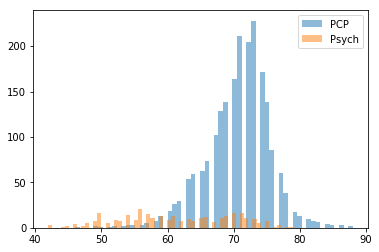

In [229]:
plt.hist(df_copy['average_age_of_beneficiaries'].dropna(), bins=60, alpha=0.5, label='PCP')
plt.hist(df_psych['average_age_of_beneficiaries'].dropna(), bins=60, alpha=0.5, label='Psych')
plt.legend(loc='upper right')
plt.show()

/Users/Beto/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/Beto/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


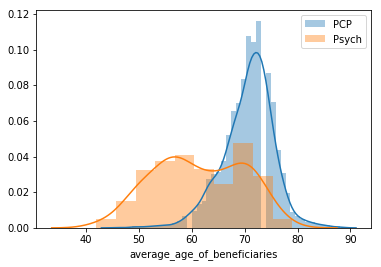

In [277]:
sns.distplot(df_pcp['average_age_of_beneficiaries'].dropna(), label='PCP')
sns.distplot(df_psych['average_age_of_beneficiaries'].dropna(), label='Psych')
plt.legend();

### We also observe that fewer Psychiatrists tend to prescribe brand named drugs, however at an over-all higher normalized rate than  PCPs

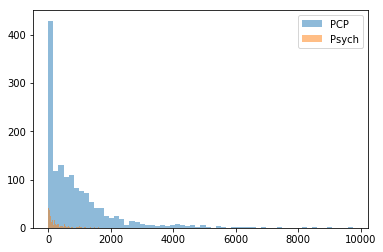

In [230]:
plt.hist(df_copy['brand_claim_count'].dropna(), bins=60, alpha=0.5, label='PCP')
plt.hist(df_psych['brand_claim_count'].dropna(), bins=60, alpha=0.5, label='Psych')
plt.legend(loc='upper right')
plt.show()

/Users/Beto/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/Beto/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


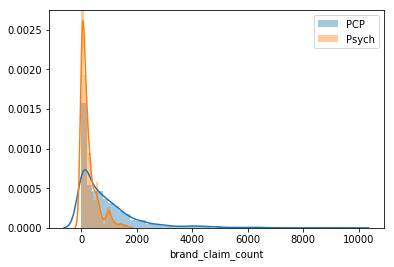

In [276]:
sns.distplot(df_pcp['brand_claim_count'].dropna(), label='PCP')
sns.distplot(df_psych['brand_claim_count'].dropna(), label='Psych')
plt.legend();

### Opiod claim counts are much less predictable among Psychiatrists compared to PCPs with fluctuating claim counts

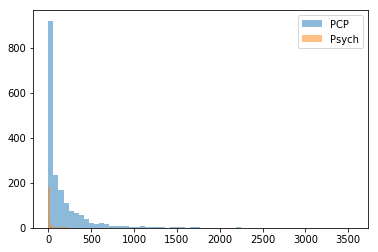

In [231]:
plt.hist(df_pcp['opioid_claim_count'].dropna(), bins=60, alpha=0.5, label='PCP')
plt.hist(df_psych['opioid_claim_count'].dropna(), bins=60, alpha=0.5, label='Psych')
plt.legend(loc='upper right')
plt.show()

/Users/Beto/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/Beto/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


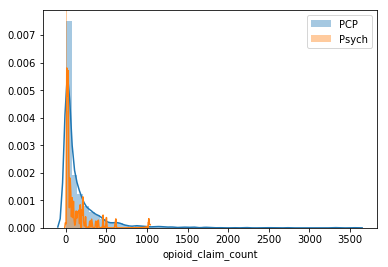

In [275]:
sns.distplot(df_pcp['opioid_claim_count'].dropna(), label='PCP')
sns.distplot(df_psych['opioid_claim_count'].dropna(), label='Psych')
plt.legend();

### We also note that fewer Psychiatrists permit 30-day-refills but again at a higher rate than PCPs

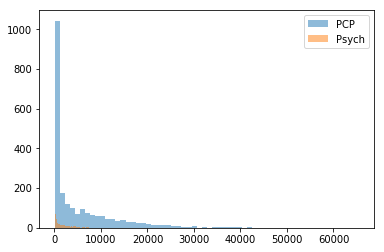

In [232]:
plt.hist(df_pcp['total_30_day_fill_count'], bins=60,alpha=0.5, label='PCP')
plt.hist(df_psych['total_30_day_fill_count'], bins=60,alpha=0.5, label='Psych')
plt.legend(loc='upper right')
plt.show()

/Users/Beto/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/Beto/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


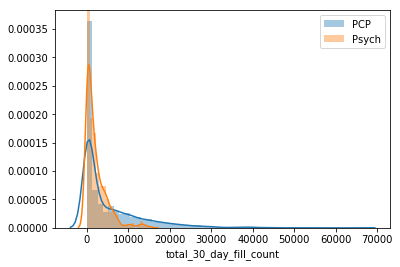

In [274]:
sns.distplot(df_pcp['total_30_day_fill_count'].dropna(), label='PCP')
sns.distplot(df_psych['total_30_day_fill_count'].dropna(), label='Psych')
plt.legend();

### Fewer Psychiatrists tend to keep total day supply, but at a higher rate than PCPs

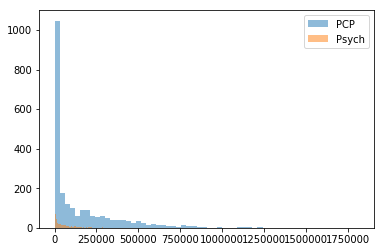

In [235]:
plt.hist(df_pcp['total_day_supply'].dropna(), bins=60,alpha=0.5, label='PCP')
plt.hist(df_psych['total_day_supply'].dropna(), bins=60,alpha=0.5, label='Psych')
plt.legend(loc='upper right')
plt.show()

/Users/Beto/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/Beto/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


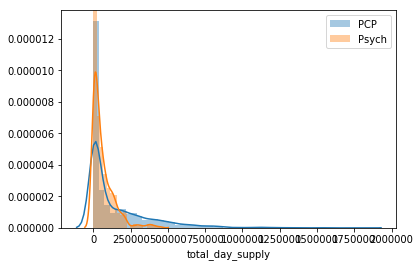

In [271]:
sns.distplot(df_pcp['total_day_supply'].dropna(), label='PCP')
sns.distplot(df_psych['total_day_supply'].dropna(), label='Psych')
plt.legend();

### Of all Doctors who prescribed psychiatric medication, PCPs prescribed opiods at an over-all higher rate than Psychiatrists

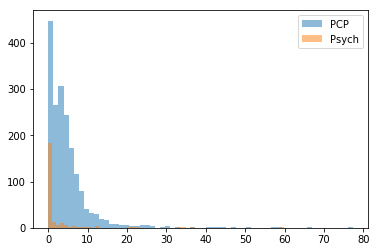

In [233]:
plt.hist(df_pcp['opioid_prescriber_rate'].dropna(), bins=60,alpha=0.5, label='PCP')
plt.hist(df_psych['opioid_prescriber_rate'].dropna(), bins=60,alpha=0.5, label='Psych')
plt.legend(loc='upper right')
plt.show()

/Users/Beto/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/Beto/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


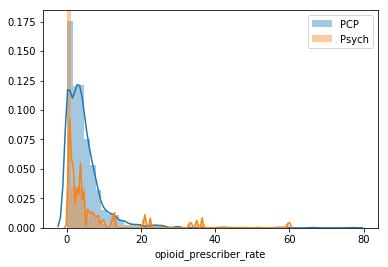

In [273]:
sns.distplot(df_pcp['opioid_prescriber_rate'].dropna(), label='PCP')
sns.distplot(df_psych['opioid_prescriber_rate'].dropna(), label='Psych')
plt.legend();

## Conclusion

### Moving forward we could use this data to make predictions about the treatment patterns of specific providers or further downstream in a recommendation engine. In the future we could also include remaining data to determine other factors not directly related which may further have influence on treatment patterns.